In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path, PureWindowsPath

In [3]:
# we use the `Path` function from pathlib to tell python what the path looks like. If you use this code you're
# going to need to change the name after `Users` to your username!
data_2016 = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/AU Work/2016_census_files")
shp_file_path = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Shared 228 Sydney Folder/SA2 Shapefiles")

In [4]:
#read in median values 
sa2_medians_16 = pd.read_csv(data_2016/'SA2_NSW/2016Census_G02_NSW_SA2.csv')
# Read in the sa2 Shapefile for 2016
sa2_shape16 = gpd.read_file(shp_file_path/'sa2_ucl.dbf')
sa2_shape16['SA2_MAIN16']=sa2_shape16['SA2_MAIN16'].astype(int)

In [5]:
sa2_shape16.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SA2_MAIN16  265 non-null    int32   
 1   SA2_5DIG16  265 non-null    object  
 2   SA2_NAME16  265 non-null    object  
 3   SA3_CODE16  265 non-null    object  
 4   SA3_NAME16  265 non-null    object  
 5   SA4_CODE16  265 non-null    object  
 6   SA4_NAME16  265 non-null    object  
 7   GCC_CODE16  265 non-null    object  
 8   GCC_NAME16  265 non-null    object  
 9   STE_CODE16  265 non-null    object  
 10  STE_NAME16  265 non-null    object  
 11  AREASQKM16  265 non-null    float64 
 12  geometry    265 non-null    geometry
dtypes: float64(1), geometry(1), int32(1), object(10)
memory usage: 26.0+ KB


In [6]:
# Merge shapefile with medians file
sa2_2016 = pd.merge(sa2_medians_16,sa2_shape16,left_on='SA2_MAINCODE_2016',right_on='SA2_MAIN16',how='left')
sa2_2016.dropna(inplace=True)

Create dummy variables for case study areas:

In [13]:
sa2_2016['red_wat_dv'] = np.where((sa2_2016.SA2_MAINCODE_2016==117031335)
                                      |(sa2_2016.SA2_MAINCODE_2016==117031338),1,0)

sa2_2016['marrick_dv'] = np.where((sa2_2016.SA2_MAINCODE_2016==117021326),1,0)

sa2_2016['t3_corr_dv']= np.where((sa2_2016.SA2_MAINCODE_2016==117021328)
                                  |(sa2_2016.SA2_MAINCODE_2016==117021326)
                                  |(sa2_2016.SA2_MAINCODE_2016==117031330)
                                  |(sa2_2016.SA2_MAINCODE_2016==117031332)
                                  |(sa2_2016.SA2_MAINCODE_2016==117021327)
                                  |(sa2_2016.SA2_MAINCODE_2016==117031335)
                                  |(sa2_2016.SA2_MAINCODE_2016==117031337)
                                  |(sa2_2016.SA2_MAINCODE_2016==119021362)
                                  |(sa2_2016.SA2_MAINCODE_2016==119011571)
                                  |(sa2_2016.SA2_MAINCODE_2016==120031392)
                                  |(sa2_2016.SA2_MAINCODE_2016==120031394)
                                  |(sa2_2016.SA2_MAINCODE_2016==119011361)
                                  |(sa2_2016.SA2_MAINCODE_2016==127021511)
                                  |(sa2_2016.SA2_MAINCODE_2016==120031390)
                                  |(sa2_2016.SA2_MAINCODE_2016==120031395)
                                  |(sa2_2016.SA2_MAINCODE_2016==127021513)
                                  |(sa2_2016.SA2_MAINCODE_2016==125011587)
                                  |(sa2_2016.SA2_MAINCODE_2016==125031479)
                                  |(sa2_2016.SA2_MAINCODE_2016==120031575)
                                  |(sa2_2016.SA2_MAINCODE_2016==120031391)
                                  |(sa2_2016.SA2_MAINCODE_2016==125011585)
                                  |(sa2_2016.SA2_MAINCODE_2016==125031480)
                                  |(sa2_2016.SA2_MAINCODE_2016==125011586)
                                  |(sa2_2016.SA2_MAINCODE_2016==120031396)
                                  |(sa2_2016.SA2_MAINCODE_2016==125011473)
                                  |(sa2_2016.SA2_MAINCODE_2016==119021366)
                                  |(sa2_2016.SA2_MAINCODE_2016==119011572)
                                  |(sa2_2016.SA2_MAINCODE_2016==119021574)
                                  |(sa2_2016.SA2_MAINCODE_2016==127031598)
                                  |(sa2_2016.SA2_MAINCODE_2016==119021573)
                                  |(sa2_2016.SA2_MAINCODE_2016==119021363)
                                  |(sa2_2016.SA2_MAINCODE_2016==127031601),1,0)

In [14]:
sa2_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 294 to 575
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   SA2_MAINCODE_2016              265 non-null    int64   
 1   Median_age_persons             265 non-null    int64   
 2   Median_mortgage_repay_monthly  265 non-null    int64   
 3   Median_tot_prsnl_inc_weekly    265 non-null    int64   
 4   Median_rent_weekly             265 non-null    int64   
 5   Median_tot_fam_inc_weekly      265 non-null    int64   
 6   Average_num_psns_per_bedroom   265 non-null    float64 
 7   Median_tot_hhd_inc_weekly      265 non-null    int64   
 8   Average_household_size         265 non-null    float64 
 9   SA2_MAIN16                     265 non-null    float64 
 10  SA2_5DIG16                     265 non-null    object  
 11  SA2_NAME16                     265 non-null    object  
 12  SA3_CODE16                     265

In [15]:
output_shape = sa2_2016[['SA2_MAIN16','red_wat_dv','marrick_dv','t3_corr_dv']]

In [16]:
output_shape.to_csv('dummies_t3_corridor.csv')

In [22]:
sa2_2016 = gpd.GeoDataFrame(sa2_2016)

## Creating descriptive statistics for weekly median rent and monthly median mortgage payments

This section we break out what the weekly rent and monthly mortgage payments are for our case study areas.

In [29]:
# isolate the variables from the corrspondence merge to add into the bottom dataframes that compare regional median
reg_med16 = sa2_2016[['SA2_MAINCODE_2016','Median_mortgage_repay_monthly',
                         'Median_rent_weekly','red_wat_dv','marrick_dv','geometry']]

In [30]:
reg_med16['mort_dv'] = np.where((reg_med16.Median_mortgage_repay_monthly<2167),1,0).copy()
reg_med16['rent_dv'] = np.where((reg_med16.Median_rent_weekly<450),1,0).copy()

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# Calculate mean median mortgage in Redfern/Waterloo
reg_med16['Median_mortgage_repay_monthly'].groupby(reg_med16['red_wat_dv']).agg(['count','mean'])

,count,mean
red_wat_dv,,
0,263,2244.08365
1,2,2396.00000


In [32]:
# Calculate mean median mortgage in Marrickville
reg_med16['Median_mortgage_repay_monthly'].groupby(reg_med16['marrick_dv']).agg(['count','mean'])

,count,mean
marrick_dv,,
0,264,2244.708333
1,1,2383.000000


In [33]:
# Calculate mean median rent in Redfern/Waterloo
reg_med16['Median_rent_weekly'].groupby(reg_med16['red_wat_dv']).agg(['count','mean'])

,count,mean
red_wat_dv,,
0,263,458.444867
1,2,560.000000


In [34]:
# Calculate mean median rent in Marrickville
reg_med16['Median_rent_weekly'].groupby(reg_med16['marrick_dv']).agg(['count','mean'])

,count,mean
marrick_dv,,
0,264,459.246212
1,1,450.000000


## Creating shapes for Case Study Areas:
This section dissolves boundaries for the case study areas Redfern/Waterloo, Marrickville, and Banksie/Camptown.

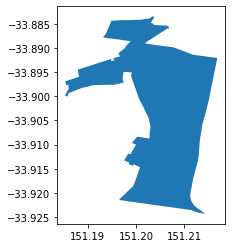

In [35]:
# let's isolate the sa2s that make up our case study areas of Redfern/Waterloo
red_wat_gdf = sa2_2016[(sa2_2016.SA2_MAIN16==117031335)
                          |(sa2_2016.SA2_MAIN16==117031338)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
red_wat_simple = red_wat_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
red_wat_sgdf=red_wat_simple.dissolve(by="SA4_NAME16")
red_wat_sgdf.plot()

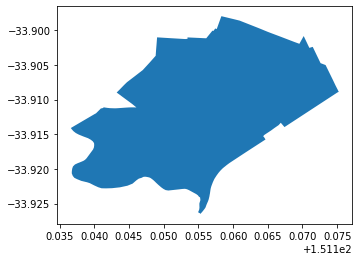

In [36]:
# let's isolate the sa2s that make up our case study areas of  Marrickville
marr_gdf = sa2_2016[(sa2_2016.SA2_MAIN16==117021326)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
marr_simple = marr_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
marr_sgdf=marr_simple.dissolve(by="SA4_NAME16")
marr_sgdf.plot()

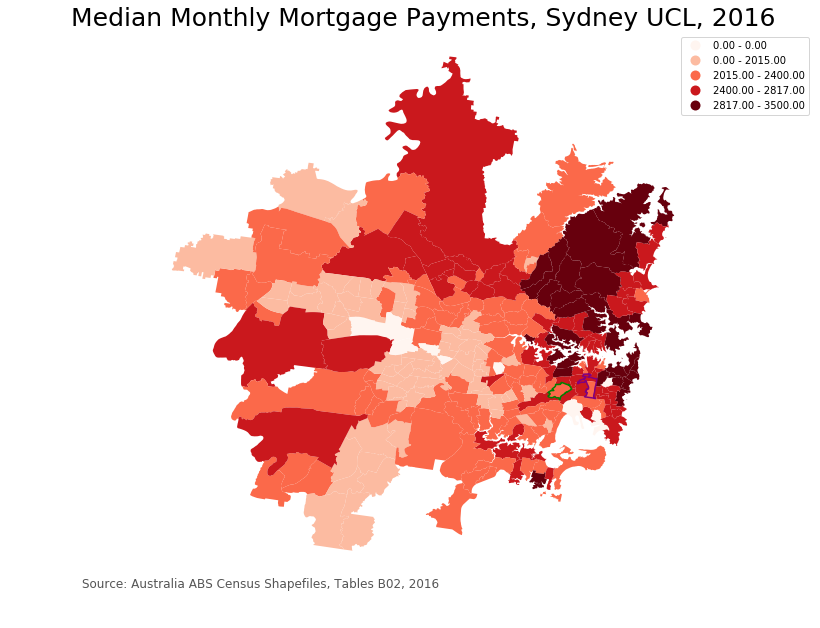

In [42]:
# Create map of Sydney UCL 
figure, ax = plt.subplots(figsize=(14,10))
base = reg_med16.plot(column="Median_mortgage_repay_monthly", scheme = "fisher_jenks", k = 5, 
                       legend=True, ax=ax, cmap="Reds")

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()

ax.set_title('Median Monthly Mortgage Payments, Sydney UCL, 2016', fontdict={'fontsize':25})

ax.annotate('Source: Australia ABS Census Shapefiles, Tables B02, 2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

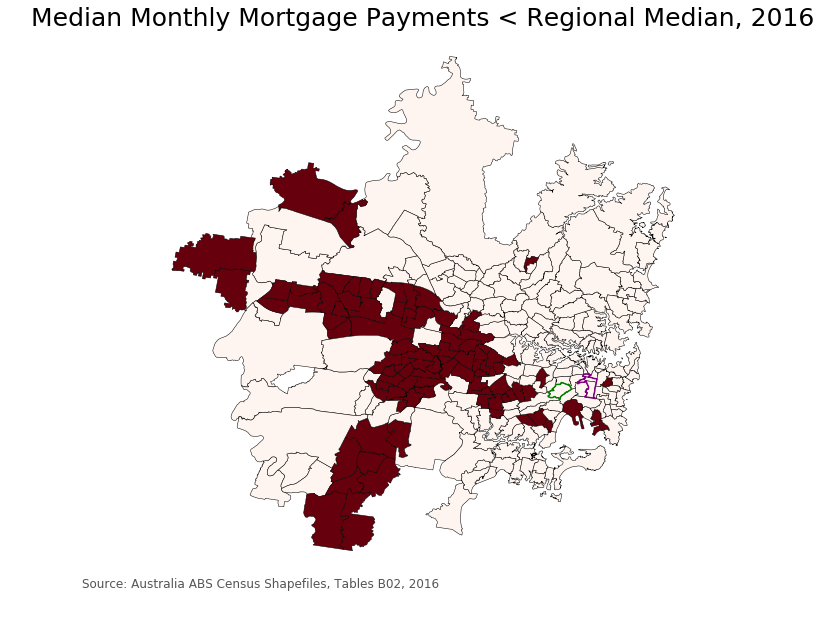

In [43]:
figure, ax = plt.subplots(figsize=(14,10))
base = reg_med16.plot(column="mort_dv", ax=ax, cmap="Reds", edgecolor='Black',linewidth=.5)

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()


ax.set_title('Median Monthly Mortgage Payments < Regional Median, 2016', fontdict={'fontsize':25})


ax.annotate('Source: Australia ABS Census Shapefiles, Tables B02, 2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

Text(0.5, 1, 'Median Weekly Rent Payments, Greater Sydney, 2011')

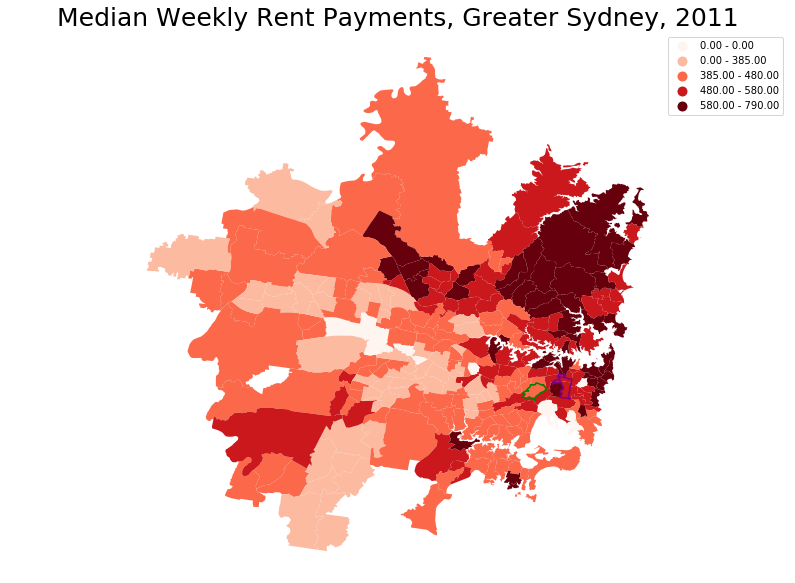

In [44]:
figure, ax = plt.subplots(figsize=(14,10))
base = reg_med16.plot(column="Median_rent_weekly", 
                scheme = "fisher_jenks", 
                k = 5, 
                legend=True, 
                ax=ax, 
                cmap="Reds")

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()

ax.set_title('Median Weekly Rent Payments, Greater Sydney, 2011', fontdict={'fontsize':25})

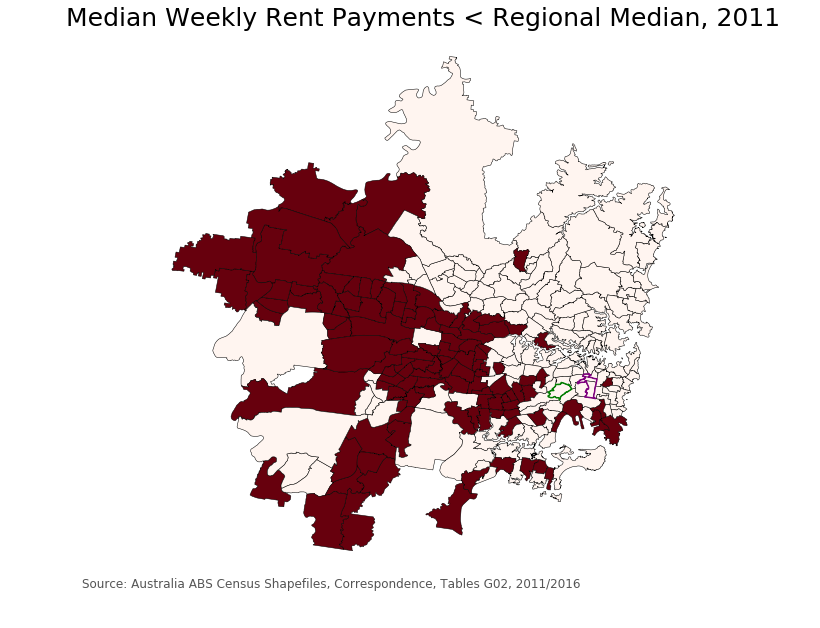

In [45]:
figure, ax = plt.subplots(figsize=(14,10))
base = reg_med16.plot(column="rent_dv", ax=ax, cmap="Reds",edgecolor='Black',linewidth=.5)

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "Purple", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "Green", linewidth = 1.5)

lims=plt.axis('equal')
ax.set_axis_off()


ax.set_title('Median Weekly Rent Payments < Regional Median, 2011', fontdict={'fontsize':25})

ax.annotate('Source: Australia ABS Census Shapefiles, Correspondence, Tables G02, 2011/2016',
            xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

plt.show()

# Create an output CSV to apply to master document for typology sets

In [48]:
output_csv = reg_med16[['SA2_MAINCODE_2016','red_wat_dv','marrick_dv','mort_dv','rent_dv']]
output_csv.to_csv('2016_UCL_MortRent.csv')

In [49]:
reg_med16.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 265 entries, 294 to 575
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   SA2_MAINCODE_2016              265 non-null    int64   
 1   Median_mortgage_repay_monthly  265 non-null    int64   
 2   Median_rent_weekly             265 non-null    int64   
 3   red_wat_dv                     265 non-null    int32   
 4   marrick_dv                     265 non-null    int32   
 5   geometry                       265 non-null    geometry
 6   mort_dv                        265 non-null    int32   
 7   rent_dv                        265 non-null    int32   
dtypes: geometry(1), int32(4), int64(3)
memory usage: 24.5 KB
